In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('Employee_Performance.csv')

In [20]:
print("Shape: ",df.shape)
df.head(10)

Shape:  (300, 8)


,Employee_ID,Age,Gender,Education_Level,Years_Experience,Sales_Training,Previous_Sales,Sales_Performance
0,1,50,Female,Bachelors,2,Yes,166,196
1,2,36,Female,High School,16,Yes,435,484
2,3,29,Female,High School,4,No,393,364
3,4,42,Male,Masters,11,Yes,121,192
4,5,40,Female,Bachelors,17,No,444,429
5,6,44,Male,Bachelors,13,Yes,113,210
6,7,32,Male,PhD,10,No,254,249
7,8,32,Male,Masters,8,No,258,260
8,9,45,Female,High School,1,Yes,121,142
9,10,57,Female,PhD,11,No,326,332


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Employee_ID        300 non-null    int64 
 1   Age                300 non-null    int64 
 2   Gender             300 non-null    object
 3   Education_Level    300 non-null    object
 4   Years_Experience   300 non-null    int64 
 5   Sales_Training     300 non-null    object
 6   Previous_Sales     300 non-null    int64 
 7   Sales_Performance  300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB


In [21]:
df.describe()

,Employee_ID,Age,Years_Experience,Previous_Sales,Sales_Performance
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,41.186667,9.110000,278.050000,303.400000
std,86.746758,11.275739,5.868506,131.521814,119.775487
min,1.000000,22.000000,0.000000,50.000000,40.000000
25%,75.750000,30.000000,4.000000,166.000000,210.000000
50%,150.500000,43.000000,9.000000,286.500000,303.500000
75%,225.250000,51.000000,14.000000,394.750000,404.000000
max,300.000000,59.000000,19.000000,498.000000,546.000000


In [27]:
duplicate = df.duplicated().sum()
print("Duplicate: ",duplicate)

Duplicate:  0


In [29]:
missing = df.isnull().sum()
print(missing)

Employee_ID          0
Age                  0
Gender               0
Education_Level      0
Years_Experience     0
Sales_Training       0
Previous_Sales       0
Sales_Performance    0
dtype: int64


In [30]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [32]:
print ("Numerical Columns: ",numerical_columns)
print ("Categorical Columns: ",categorical_columns)

Numerical Columns:  Index(['Employee_ID', 'Age', 'Years_Experience', 'Previous_Sales',
       'Sales_Performance'],
      dtype='object')
Categorical Columns:  Index(['Gender', 'Education_Level', 'Sales_Training'], dtype='object')


In [36]:
# Calculate the covariance matrix
covariance_matrix = df.cov(numeric_only=True)
print("Covariance Matrix:")
display(covariance_matrix)

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
display(correlation_matrix)

Covariance Matrix:


,Employee_ID,Age,Years_Experience,Previous_Sales,Sales_Performance
Employee_ID,7525.000000,130.404682,24.366221,49.456522,13.735786
Age,130.404682,127.142297,-0.823278,28.127759,15.714381
Years_Experience,24.366221,-0.823278,34.439365,6.235284,110.266890
Previous_Sales,49.456522,28.127759,6.235284,17297.987458,15321.026756
Sales_Performance,13.735786,15.714381,110.266890,15321.026756,14346.167224



Correlation Matrix:


,Employee_ID,Age,Years_Experience,Previous_Sales,Sales_Performance
Employee_ID,1.000000,0.133320,0.047864,0.004335,0.001322
Age,0.133320,1.000000,-0.012442,0.018967,0.011635
Years_Experience,0.047864,-0.012442,1.000000,0.008079,0.156874
Previous_Sales,0.004335,0.018967,0.008079,1.000000,0.972573
Sales_Performance,0.001322,0.011635,0.156874,0.972573,1.000000


from matplotlib import pyplot as plt
correlation_matrix['Employee_ID'].plot(kind='hist', bins=20, title='Employee_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['Years_Experience'].plot(kind='hist', bins=20, title='Years_Experience')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['Previous_Sales'].plot(kind='hist', bins=20, title='Previous_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='Employee_ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='Age', y='Years_Experience', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='Years_Experience', y='Previous_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='Previous_Sales', y='Sales_Performance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sales_Performance']
  ys = series['Employee_ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation_matrix.sort_values('Sales_Performance', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sales_Performance')
_ = plt.ylabel('Employee_ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sales_Performance']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation_matrix.sort_values('Sales_Performance', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sales_Performance')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sales_Performance']
  ys = series['Years_Experience']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation_matrix.sort_values('Sales_Performance', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sales_Performance')
_ = plt.ylabel('Years_Experience')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Sales_Performance']
  ys = series['Previous_Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation_matrix.sort_values('Sales_Performance', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sales_Performance')
_ = plt.ylabel('Previous_Sales')

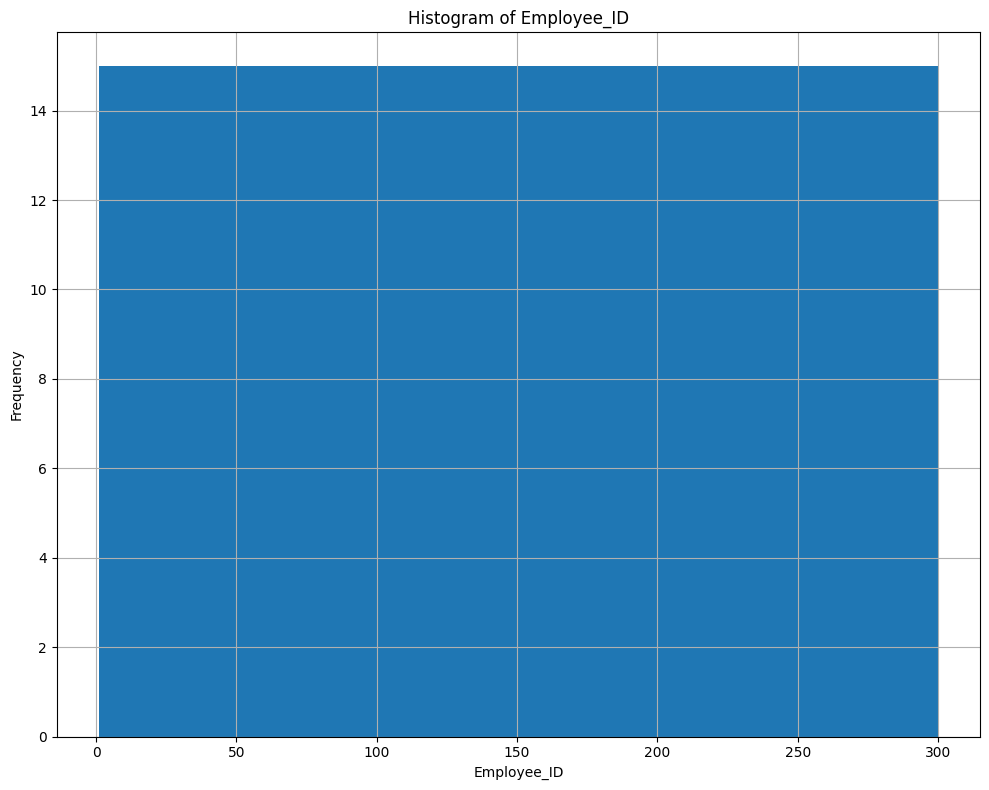

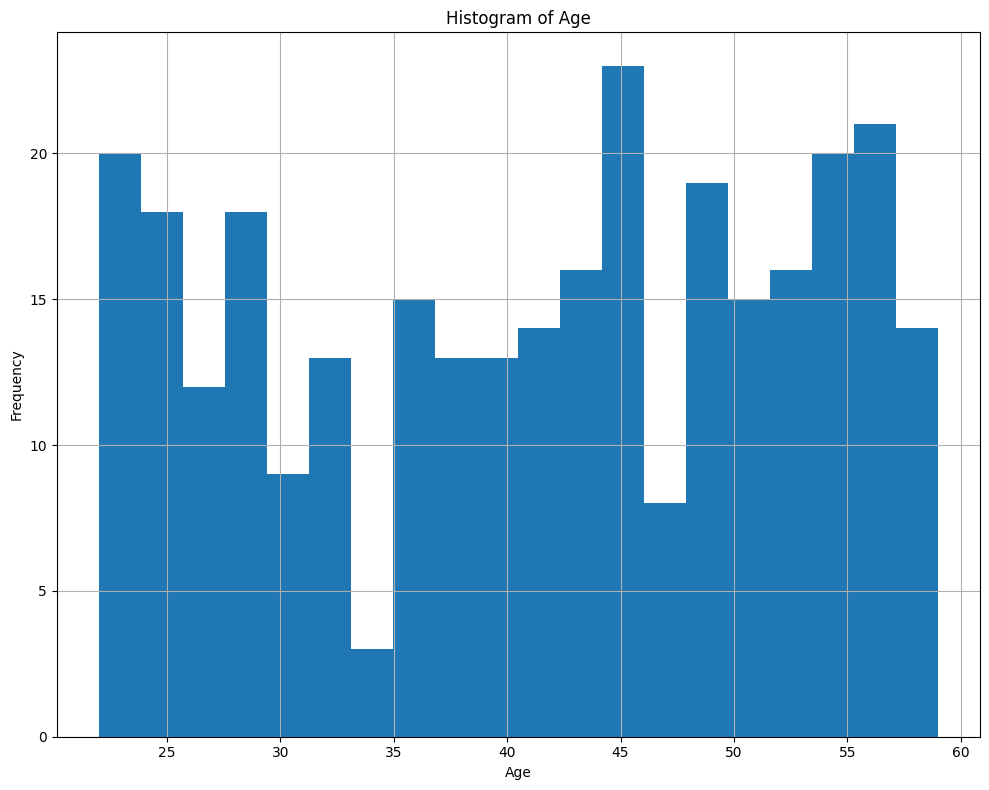

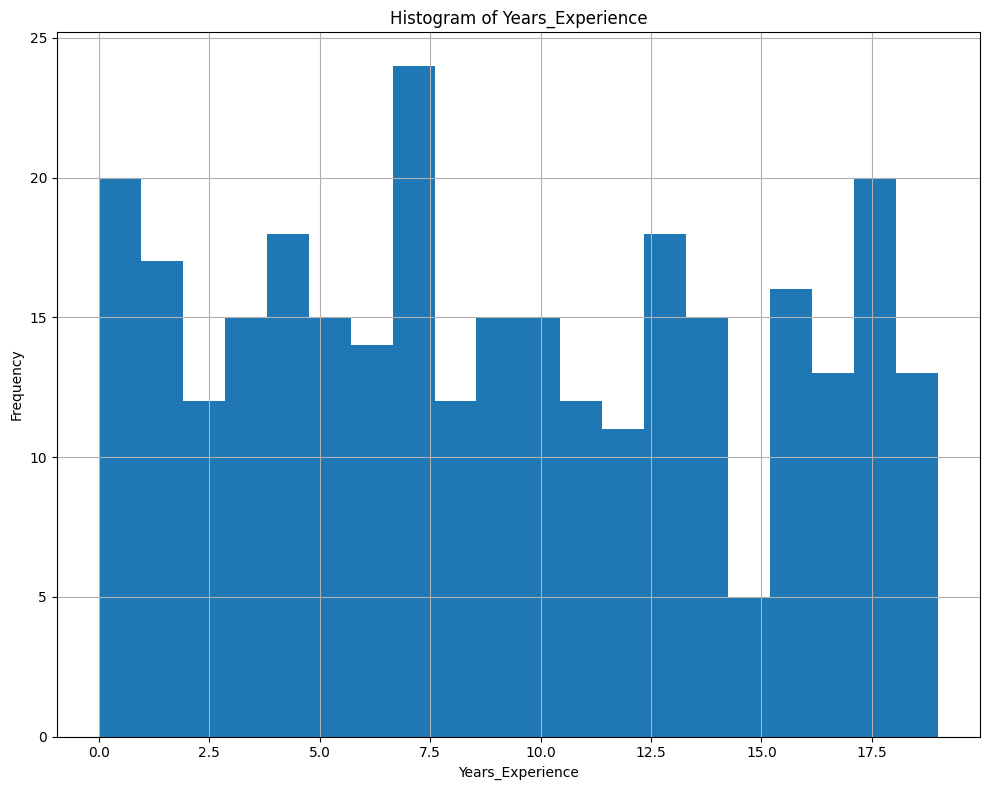

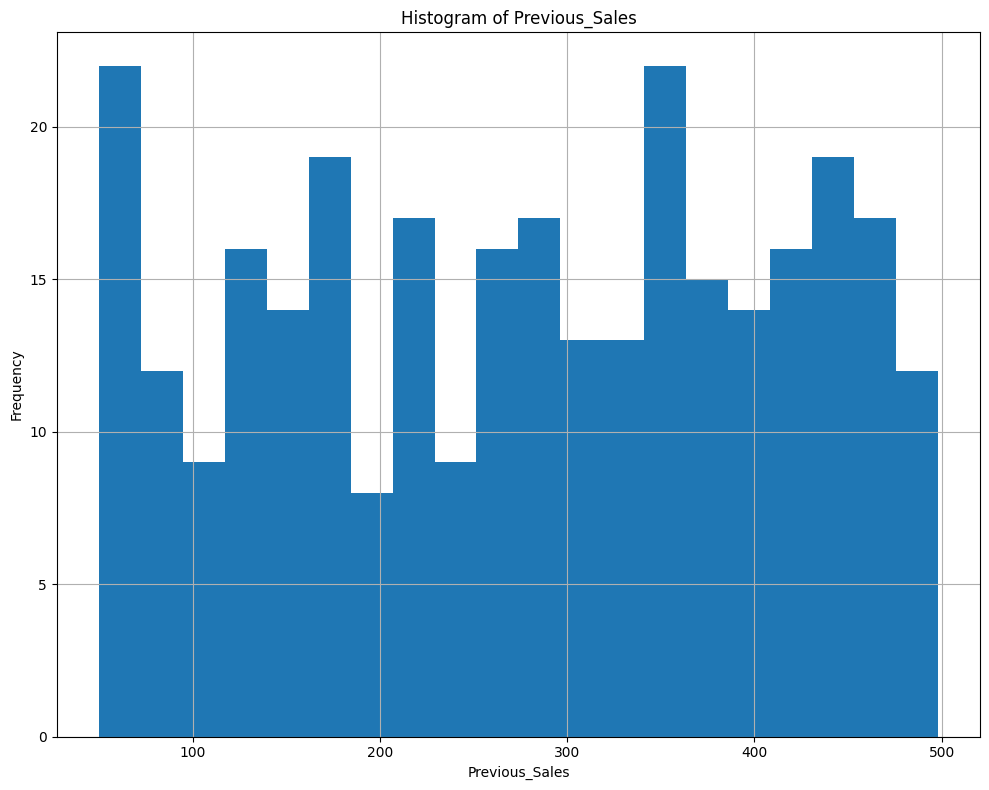

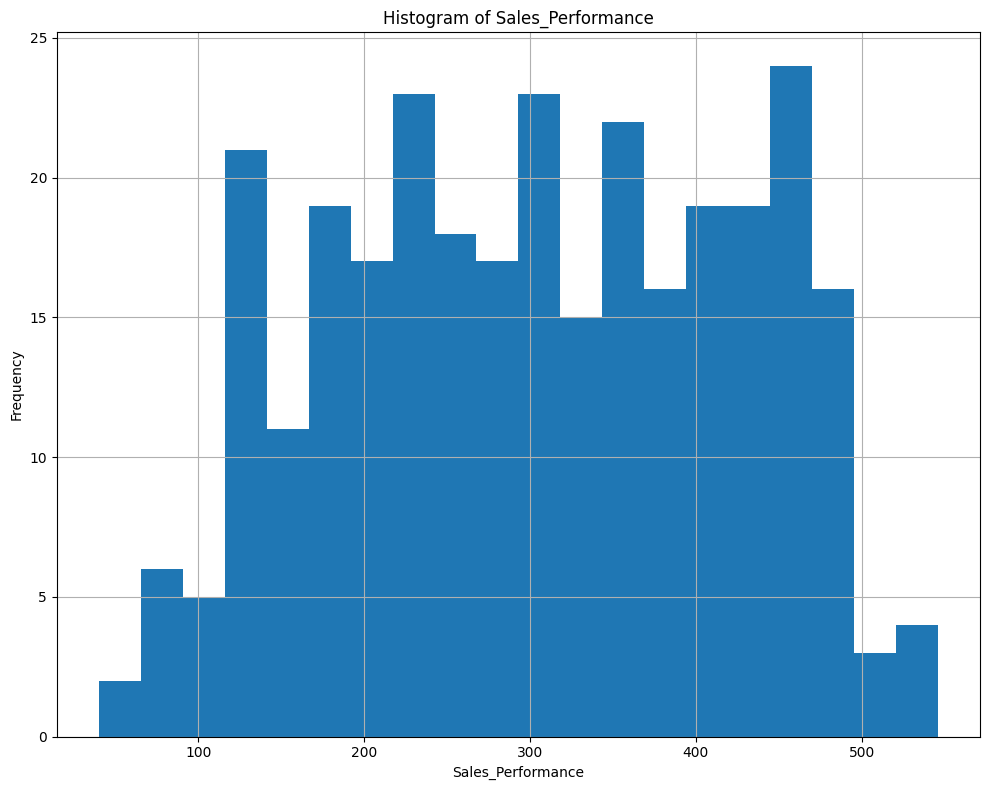

In [40]:
for column in numerical_columns:
    df[column].hist(figsize=(10,8), bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

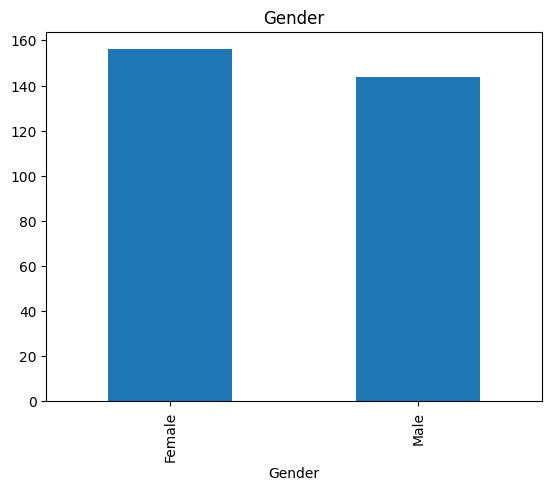

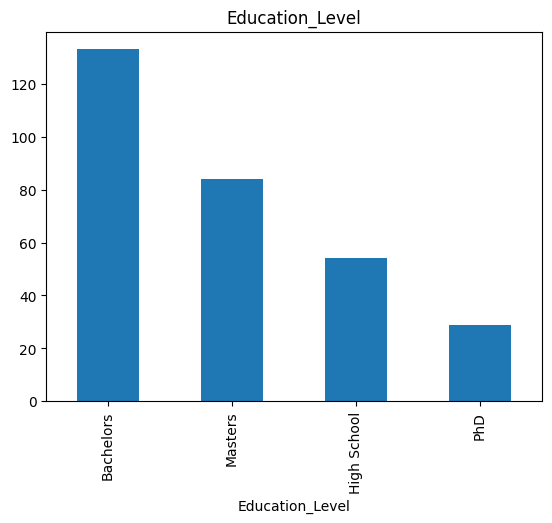

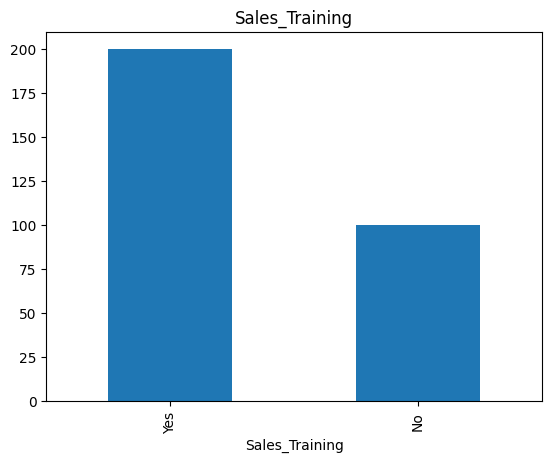

In [44]:
for col in categorical_columns:
  df [col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

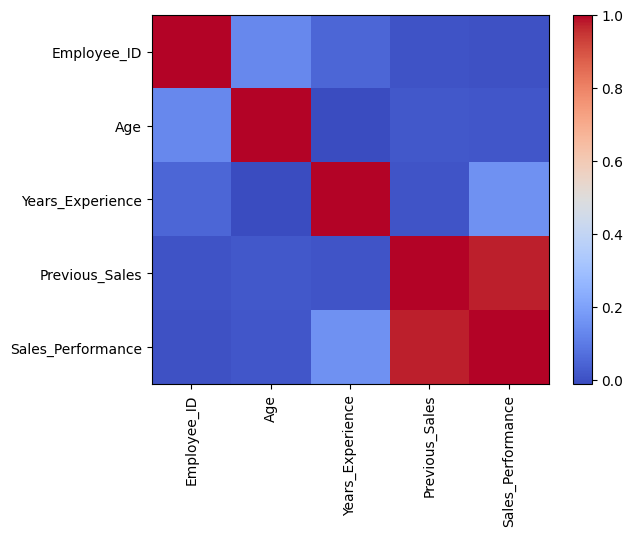

<Figure size 1000x800 with 0 Axes>

In [46]:
corr = df[numerical_columns].corr()
plt.imshow(corr, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.figure(figsize=(10, 8))
plt.show()

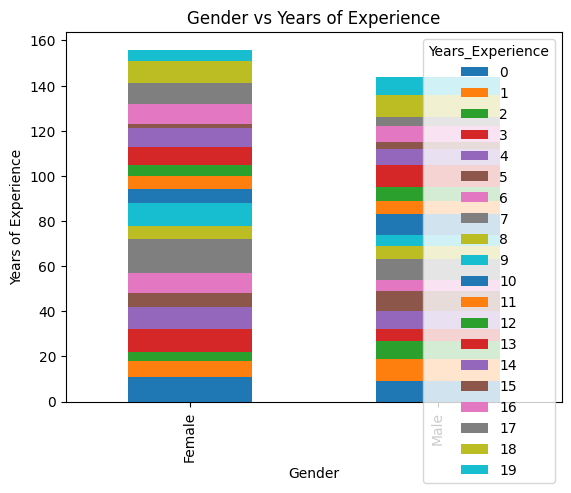

In [56]:
pd.crosstab(df['Gender'], df['Years_Experience']).plot(kind='bar', stacked=True)
plt.title('Gender vs Years of Experience')
plt.xlabel('Gender')
plt.ylabel('Years of Experience')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Sales_Performance"])   # replace with your target column name
y = df["Sales_Performance"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object","category"]).columns

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Employee_ID', 'Age', 'Years_Experience', 'Previous_Sales'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['Gender', 'Education_Level', 'Sales_Training'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 124.954357431347
RMSE: 11.178298503410392
R²: 0.9905339400820934
